In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import io
import string
from tqdm import tqdm
import spacy
import matplotlib.pyplot as plt
import nltk
from sklearn.decomposition import TruncatedSVD, randomized_svd

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_json('/content/drive/MyDrive/Atelier_NLP_5eme_PI/Clean_Database.json')

In [ ]:
df

,Title_1,Title_2,Title_3,Title_4,Corpus
0,Project scope management,,,,Project Scope Management includes the process ...
1,Project scope management,Plan scope management,,,Plan Scope Management is the process of creati...
2,Project scope management,Plan scope management,Inputs,Project charter,Described in Section The project charter Docum...
3,Project scope management,Plan scope management,Inputs,Project management plan,Described in Section Project management plan c...
4,Project scope management,Plan scope management,Inputs,Enterprise environmental factors,The enterprise environmental factors that can ...
...,...,...,...,...,...
211,Project cost management,Control costs,Outputs,Work performance information,Described in Section Work performance informat...
212,Project cost management,Control costs,Outputs,Cost forecasts,Either a calculated A value or a bottom up A v...
213,Project cost management,Control costs,Outputs,Change requests,Described in Section Analysis of project perfo...
214,Project cost management,Control costs,Outputs,Project management plan updates,Any change to the project management plan goes...


In [ ]:
df['Corpus'] = df['Corpus'].str.lower()

# Data Preparation

## Tokenization 

In [ ]:
 import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
Tokens_Corpus = df["Corpus"].apply(nltk.word_tokenize).tolist()

## Removing Stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nlp = spacy.load('en_core_web_sm')
from nltk.corpus import stopwords


In [ ]:
def clean_text_stopwords(text):
  STOPWORDS = set(stopwords.words('english'))
  text = ' '.join(word for word in text if word not in STOPWORDS)
  return text

In [ ]:
corpus_no_stop_words = []
for i in Tokens_Corpus:
    text = clean_text_stopwords(i)
    corpus_no_stop_words.append(text)

In [ ]:
corpus_no_stop_words[1]

'plan scope management process creating scope management plan document project product scope defined validated controlled key benefit process provides guidance direction scope managed throughout project process performed predefined points project inputs tools techniques outputs process depicted figure figure depicts data flow diagram process plan scope management inputs tools techniques outputs project charter expert judgment scope management plan project management plan data analysis requirements management quality management plan alternatives analysis plan project life cycle description meetings development approach enterprise environmental factors organizational process sets figure plan scope management inputs tools techniques outputs develop project charter project charter project project management plan scope management plan manager project scope management plan plan charter requirements management plan quality management plan project life cycle description development approach en

## Lemmatization and Stemming

In [ ]:

from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
  
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
#     texts_out = []
#     for sent in texts:
#         doc = nlp(" ".join(sent)) 
#         texts_out.append(" ".join([token.lemma if token.lemma not in ['-PRON-'] else '' for token in doc if token.pos in allowed_postags]))
#     return texts_out

# # Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# # Run in terminal: python3 -m spacy download en
# nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# # Do lemmatization keeping only Noun, Adj, Verb, Adverb
# data_lemmatized = lemmatization(Tokens_Corpus_new, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])


In [ ]:
# #print(Tokens_Corpus_new[:2])
# print(data_lemmatized[1])

In [ ]:
# Tokens_Corpus_new = Tokens_Corpus.apply(nltk.word_tokenize).tolist()

In [ ]:
#Tokenizing
Tokens_Corpus_new = []
for i in corpus_no_stop_words: 
    token = nltk.word_tokenize(i)
    Tokens_Corpus_new.append(token)

In [ ]:
#lemmatization
Corpus_lemmatized = []
for i in Tokens_Corpus_new:
  lemmatized_words = []
  for word in i:
    lem = lemmatizer.lemmatize(word)
    lemmatized_words.append(lem)
  Corpus_lemmatized.append(set(lemmatized_words)) #we want to skip the duplicates as we may have same lems for different words

In [ ]:
#stemming
Corpus_stemmed = []
for i in Tokens_Corpus_new:
  stemmed_words = []
  for word in i:
    stem = ps.stem(word)
    stemmed_words.append(stem)
  Corpus_stemmed.append(stemmed_words)

In [ ]:
# joining our words to build back our corpus ( lemming)
Corpus_new_lem = []
for i in Corpus_lemmatized:
    text = ' '.join(word for word in i )
    Corpus_new_lem.append(text)

In [ ]:
# joining our words to build back our corpus (stemming)
Corpus_new_stem = []
for i in Corpus_stemmed:
    text = ' '.join(word for word in i )
    Corpus_new_stem.append(text)

## TF-IDF


In [ ]:
def words_weight_df(corpus,vectorizer):
        weight_matrix = vectorizer.fit_transform(corpus)
        return pd.DataFrame(weight_matrix.toarray(),columns=vectorizer.get_feature_names())

In [ ]:
tfidf_vect = TfidfVectorizer()
df_weights=words_weight_df(Corpus_new_stem,tfidf_vect)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df_weights

,abbrevi,abil,abl,abstract,acceler,accept,accompani,accomplish,accord,account,...,world,worst,would,write,written,yard,year,yen,yield,zero
0,0.0,0.0,0.0,0.0,0.0,0.053674,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.174283,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
212,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
213,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###  Filtering the TF-IDF weights dataframe

In [ ]:
feature_names = tfidf_vect.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#feature_names

In [ ]:
# creating a dataframe to visualize the weights
df_words_weights = pd.DataFrame()
df_words_weights.insert(0,"word",feature_names)

In [ ]:
element = []
for i in feature_names:   
    element.append(df_weights[i].mean())
df_words_weights.insert(1,"word_weight",element) 

In [ ]:
df_words_weights

,word,word_weight
0,abbrevi,0.000121
1,abil,0.001719
2,abl,0.000190
3,abstract,0.000422
4,acceler,0.000784
...,...,...
1260,yard,0.000577
1261,year,0.001783
1262,yen,0.000245
1263,yield,0.000158


In [ ]:
#sorting the values 
df_words_weights.sort_values(by="word_weight",ascending=False,inplace = True)

In [ ]:
columns_1 = df_words_weights['word'].tolist()
columns_to_keep = []

In [ ]:
for i in columns_1:
    if i.isnumeric() == False:
        columns_to_keep.append(i)

In [ ]:
#columns_to_keep

In [ ]:
# let's drop in our weights dataframe the columns other than the ones in our extracted list
df_weights.drop(columns=[col for col in df_weights if col not in columns_to_keep], inplace=True)

In [ ]:
df_weights

,abbrevi,abil,abl,abstract,acceler,accept,accompani,accomplish,accord,account,...,world,worst,would,write,written,yard,year,yen,yield,zero
0,0.0,0.0,0.0,0.0,0.0,0.053674,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.174283,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
212,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
213,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Latent Semantic Anaylsis



​
#### $$ \underline{\underline{M}} = \underline{\underline{U}} * \underline{\underline{\Sigma}} * \underline{\underline{V}} ^{T} $$
​
* where M is our original (m, n) data matrix - m rows, n columns; m documents, n terms
* U is a (m, r) matrix - m documents and r *concepts*
* $ {\Sigma} $ is a *diagonal* (r,r) matrix - all values except those in the diagonal are zero. (But what do the non-zero values represent? Why r*r? 
* V is a (n,r) matrix - n terms, r concepts - what shape will it have when transposed?
​
​
If we were to decompose this to 5 components, this would look something like this:
​
### $$ M_{trunc} =  \sum_{i}^{5} {\sigma}_{i}\underline{u}_{i} {\otimes} \underline{v}_{i}^T  $$
​
where there would be originally r number of u vectors; 5 singular values and n $v^{T}$ vectors. 


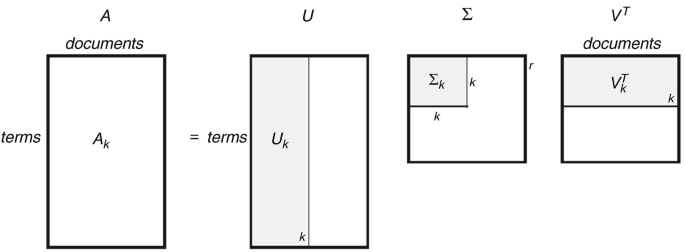

### Count Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(Corpus_new_lem)

In [ ]:
bag_of_words.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
svd = TruncatedSVD(n_components=8,n_iter=1487, random_state=42)

sample_decomp = svd.fit_transform(df_weights.to_numpy())
#sample_decomp = svd.fit_transform(bag_of_words)
df_weights
Sigma = svd.singular_values_
U = sample_decomp/Sigma
V_T = svd.components_

In [ ]:
sample_decomp

array([[ 0.66452517,  0.31941731,  0.21563835, ..., -0.14574081,
        -0.15041232,  0.08885907],
       [ 0.61254497,  0.39416714,  0.28194903, ...,  0.00628618,
        -0.30869692, -0.1135447 ],
       [ 0.25981049, -0.0251502 , -0.11731495, ..., -0.18090791,
        -0.07114512,  0.09574337],
       ...,
       [ 0.48200795,  0.34779236, -0.20439374, ...,  0.10917511,
         0.33842281,  0.01854193],
       [ 0.51278335,  0.31306013, -0.07318471, ...,  0.00733467,
         0.16338021, -0.07200718],
       [ 0.4717013 , -0.24217179, -0.02871092, ..., -0.27637925,
         0.17827457, -0.19789191]])

In [ ]:
print(U.shape)
print(Sigma.shape)
print(V_T.shape)

(216, 8)
(8,)
(8, 1265)


In [ ]:
Sigma

array([5.46707641, 2.88546786, 2.67574769, 2.63048593, 2.56678123,
       2.40989389, 2.3607379 , 2.05825328])

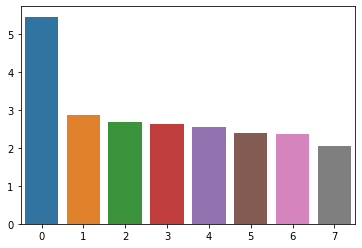

In [ ]:
import seaborn as sns
sns.barplot(x=list(range(len(Sigma))), y = Sigma)

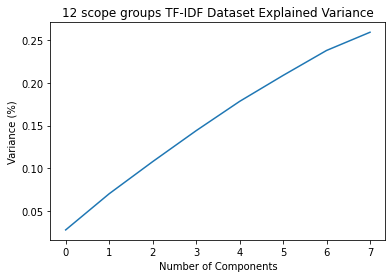

In [ ]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('12 scope groups TF-IDF Dataset Explained Variance')
plt.show()

In [ ]:
sample_decomp

array([[ 0.66452517,  0.31941731,  0.21563835, ..., -0.14574081,
        -0.15041232,  0.08885907],
       [ 0.61254497,  0.39416714,  0.28194903, ...,  0.00628618,
        -0.30869692, -0.1135447 ],
       [ 0.25981049, -0.0251502 , -0.11731495, ..., -0.18090791,
        -0.07114512,  0.09574337],
       ...,
       [ 0.48200795,  0.34779236, -0.20439374, ...,  0.10917511,
         0.33842281,  0.01854193],
       [ 0.51278335,  0.31306013, -0.07318471, ...,  0.00733467,
         0.16338021, -0.07200718],
       [ 0.4717013 , -0.24217179, -0.02871092, ..., -0.27637925,
         0.17827457, -0.19789191]])

In [ ]:
topic_encoded_df = pd.DataFrame(sample_decomp, columns=["topic1", "topic2","topic3","topic4","topic5","topic6","topic7","topic8"])


In [ ]:
topic_encoded_df

,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8
0,0.664525,0.319417,0.215638,-0.291065,-0.027883,-0.145741,-0.150412,0.088859
1,0.612545,0.394167,0.281949,-0.268789,-0.105043,0.006286,-0.308697,-0.113545
2,0.259810,-0.025150,-0.117315,-0.195643,0.119119,-0.180908,-0.071145,0.095743
3,0.349147,0.111407,0.063791,-0.183840,0.005793,0.041862,-0.120333,-0.025558
4,0.206326,0.100710,0.273895,-0.145565,-0.092126,0.009050,-0.068522,-0.111142
...,...,...,...,...,...,...,...,...
211,0.364503,-0.007323,-0.014658,0.261268,0.152212,-0.036632,-0.016149,0.464292
212,0.073191,-0.027687,-0.017911,-0.011757,0.060868,-0.071993,-0.022352,0.101722
213,0.482008,0.347792,-0.204394,0.337928,0.009105,0.109175,0.338423,0.018542
214,0.512783,0.313060,-0.073185,0.494298,0.088572,0.007335,0.163380,-0.072007


In [ ]:
topic_encoded_df.insert(0, column="Corpus", value=Corpus_new_lem)

In [ ]:
topic_encoded_df

,Corpus,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8
0,includes enterprise creating complete included...,0.664525,0.319417,0.215638,-0.291065,-0.027883,-0.145741,-0.150412,0.088859
1,environmental diagram enterprise creating tech...,0.612545,0.394167,0.281949,-0.268789,-0.105043,0.006286,-0.308697,-0.113545
2,satisfy project intended described high constr...,0.259810,-0.025150,-0.117315,-0.195643,0.119119,-0.180908,-0.071145,0.095743
3,hybrid implemented waterfall cycle adaptive me...,0.349147,0.111407,0.063791,-0.183840,0.005793,0.041862,-0.120333,-0.025558
4,environmental culture infrastructure limited e...,0.206326,0.100710,0.273895,-0.145565,-0.092126,0.009050,-0.068522,-0.111142
...,...,...,...,...,...,...,...,...,...
211,includes compared report variant account earne...,0.364503,-0.007323,-0.014658,0.261268,0.152212,-0.036632,-0.016149,0.464292
212,bottom value communicated documented either st...,0.073191,-0.027687,-0.017911,-0.011757,0.060868,-0.071993,-0.022352,0.101722
213,schedule result disposition cost integrated pr...,0.482008,0.347792,-0.204394,0.337928,0.009105,0.109175,0.338423,0.018542
214,specified revised schedule estimate incorporat...,0.512783,0.313060,-0.073185,0.494298,0.088572,0.007335,0.163380,-0.072007


In [ ]:
# topic_encoded_df["doc"]= doc
# display(topic_encoded_df[["doc","topic1","topic2"]])

In [ ]:
dictionary = vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# encoding_matrix=pd.DataFrame(svd.components_,columns=dictionary)
# encoding_matrix

In [ ]:
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [ ]:
# topic_encoded_df.plot.bar(stacked=True)

In [ ]:
# find the maximum values of each row
maxValues = topic_encoded_df.max(axis=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
topic_encoded_df['Max_Value'] = maxValues

In [ ]:
topic_encoded_df.head()

,Corpus,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,Max_Value
0,includes enterprise creating complete included...,0.664525,0.319417,0.215638,-0.291065,-0.027883,-0.145741,-0.150412,0.088859,0.664525
1,environmental diagram enterprise creating tech...,0.612545,0.394167,0.281949,-0.268789,-0.105043,0.006286,-0.308697,-0.113545,0.612545
2,satisfy project intended described high constr...,0.259810,-0.025150,-0.117315,-0.195643,0.119119,-0.180908,-0.071145,0.095743,0.259810
3,hybrid implemented waterfall cycle adaptive me...,0.349147,0.111407,0.063791,-0.183840,0.005793,0.041862,-0.120333,-0.025558,0.349147
4,environmental culture infrastructure limited e...,0.206326,0.100710,0.273895,-0.145565,-0.092126,0.009050,-0.068522,-0.111142,0.273895


In [ ]:
import numpy as np

In [ ]:
dominant_topic = np.argmax(topic_encoded_df.iloc[:,1:8].values, axis=1)
topic_encoded_df['Domunant_Topic'] = dominant_topic +1

In [ ]:
topic_encoded_df

,Corpus,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,Max_Value,Domunant_Topic
0,includes enterprise creating complete included...,0.664525,0.319417,0.215638,-0.291065,-0.027883,-0.145741,-0.150412,0.088859,0.664525,1
1,environmental diagram enterprise creating tech...,0.612545,0.394167,0.281949,-0.268789,-0.105043,0.006286,-0.308697,-0.113545,0.612545,1
2,satisfy project intended described high constr...,0.259810,-0.025150,-0.117315,-0.195643,0.119119,-0.180908,-0.071145,0.095743,0.259810,1
3,hybrid implemented waterfall cycle adaptive me...,0.349147,0.111407,0.063791,-0.183840,0.005793,0.041862,-0.120333,-0.025558,0.349147,1
4,environmental culture infrastructure limited e...,0.206326,0.100710,0.273895,-0.145565,-0.092126,0.009050,-0.068522,-0.111142,0.273895,3
...,...,...,...,...,...,...,...,...,...,...,...
211,includes compared report variant account earne...,0.364503,-0.007323,-0.014658,0.261268,0.152212,-0.036632,-0.016149,0.464292,0.464292,1
212,bottom value communicated documented either st...,0.073191,-0.027687,-0.017911,-0.011757,0.060868,-0.071993,-0.022352,0.101722,0.101722,1
213,schedule result disposition cost integrated pr...,0.482008,0.347792,-0.204394,0.337928,0.009105,0.109175,0.338423,0.018542,0.482008,1
214,specified revised schedule estimate incorporat...,0.512783,0.313060,-0.073185,0.494298,0.088572,0.007335,0.163380,-0.072007,0.512783,1


# Summarization

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import pipeline,set_seed

In [ ]:
from nltk.tokenize import sent_tokenize

In [ ]:
pip install tdqm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
set_seed(42)
pipe = pipeline("summarization", model="t5-large", framework="tf")

Downloading:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.95G [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFT5ForConditionalGeneration.

All the layers of TFT5ForConditionalGeneration were initialized from the model checkpoint at t5-large.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


Downloading:   0%|          | 0.00/792k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/models/t5/tokenization_t5_fast.py:166: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-large automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  FutureWarning,


In [ ]:
pipe_out = pipe(Corpus_new_lem[15])

Your max_length is set to 200, but you input_length is only 22. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


In [ ]:
x = "\n ".join(sent_tokenize(pipe_out[0]["summary_text"]))

In [ ]:
Corpus_new_lem[15]

'collect described desired case required section optional criterion need business requirement meeting document influence describe process'

In [ ]:
x

'collect described desired case required section optional criterion need business requirement meeting document influence describe process .----Summary---- describe process influence describe impact on business requirement .----Summary---- collect described process described process describe process impact .----Summary---- determine if process meets business requirement and if not, how .'

In [ ]:
summaries_corpus = []
for i in Corpus_new_lem:
  pipe_out = pipe(i)
  summaries_corpus.append("\n ".join(sent_tokenize(pipe_out[0]["summary_text"])))


Your max_length is set to 80, but you input_length is only 75. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=37)
Your max_length is set to 80, but you input_length is only 18. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 80, but you input_length is only 46. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)
Your max_length is set to 80, but you input_length is only 20. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 80, but you input_length is only 19. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 80, but you input_length is only 23. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 80, but you input_length is only 26. You might consider decreasi

In [ ]:
Corpus_new_lem[40]

'schedule result includes complete creep condition following enables exit also sponsor charter phase met manager information within manage financial elaborate deliverable performed risk high change including identifies certain expectation planning common managing purpose among authorizing execution accepted guide requirement excluded person statement project service measurable milestone list assist process provides product capability set contains detailed constraint overall summary entire order contain resource ancillary degree documentation related decides acceptance success determine containing objective constitutes great help elem described assigned ie verifiable different explicitly perceived work either level may unique characteristic elaborated understanding key table explicit produced directly outside reduce name sometimes stakeholder management responsibility report additional close document assumption cancel authority exclusion description detail request criterion approval bou

In [ ]:
summaries_corpus[40]

'order includes complete creep condition following enables exit also sponsor charter phase met manager information within manage financial elaborate deliverable performed risk high change including identifies certain expectation planning common managing purpose among authorizing execution accepted guide requirement excluded person statement project service measurable milestone list assist process provides product capability set contains detailed constraint overall summary entire order contains resource ancillary degree documentation related decides acceptance success'